In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
import IPython.display
from IPython.display import Image, display
#display(Image())

In [ ]:
import IPython.display 
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'

MyDrive  Shareddrives


In [ ]:
train_path = '/content/drive/MyDrive/Skin_Cancer_Malignant_Benign/Data/test'
test_path = '/content/drive/MyDrive/Skin_Cancer_Malignant_Benign/Data/train'

Working with 360 images
Image examples: 
1.jpg


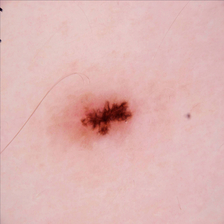

1013.jpg


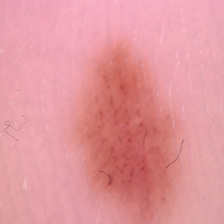

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image
#from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(2):
    print(onlybenignfiles[i])
    #display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))
    display(Image(filename=folder + "/" + onlybenignfiles[i]))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Skin_Cancer_Malignant_Benign/Data/test/*')
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
import tensorflow as tf 

In [ ]:
from keras import optimizers


adam = tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10

Epoch 00001: val_loss improved from inf to 2.07906, saving model to mymodel.h5
5/5 - 634s - loss: 2.5360 - accuracy: 0.6750 - val_loss: 2.0791 - val_accuracy: 0.7559 - 634s/epoch - 127s/step
Epoch 2/10

Epoch 00002: val_loss improved from 2.07906 to 2.04830, saving model to mymodel.h5
5/5 - 615s - loss: 2.3508 - accuracy: 0.7500 - val_loss: 2.0483 - val_accuracy: 0.7959 - 615s/epoch - 123s/step
Epoch 3/10

Epoch 00003: val_loss did not improve from 2.04830
5/5 - 668s - loss: 1.5510 - accuracy: 0.8625 - val_loss: 2.1727 - val_accuracy: 0.7783 - 668s/epoch - 134s/step
Epoch 4/10


KeyboardInterrupt: ignored

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()